In [1]:
from env import FourRoomEnvWithTagging, Action

In [2]:
def string_to_int_list(s):

    try:
        return [int(item.strip()) for item in s.strip().split(' ')]
    except ValueError as e:
        # Raise an error if any part of the string cannot be converted to an integer
        raise ValueError(f"Input string is improperly formatted or contains non-integer values: {s}") from e

In [3]:
m = FourRoomEnvWithTagging(n_imposters=1, n_crew=3, n_jobs=2)

In [4]:
m.reset()


([(8, 3), (1, 5), (8, 1), (8, 0)],
 [(6, 0), (3, 6)],
 array([0., 0.]),
 array([1., 1., 1., 1.]))

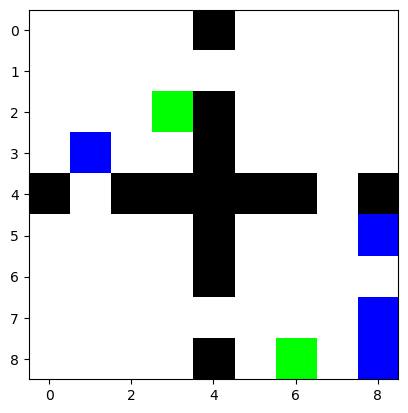

Agent 3 is tagging agent 1
Agent 2 is tagging agent 3
Agent 1 is tagging agent 0
Agent 0 is tagging agent 2


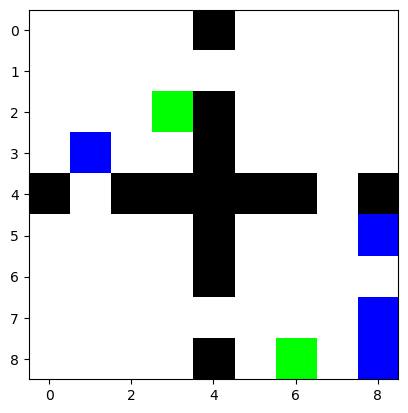

ValueError: Input string is improperly formatted or contains non-integer values: 

In [5]:
while True:
    m.render()
    agent_actions = [Action.STAY] * m.n_agents

    a = input(f"Actions as space separated str of int: ")

    if a == "q":
        break

    actions = string_to_int_list(a)
    state, reward, done, truncated, info = m.step(actions)
    
    if done:
        break

In [6]:
m.alive_agents

array([1., 1., 1., 1.])

In [7]:
print(m.agent_state_order_list)
print(m.agent_state_order_dict)

[0, 2, 3, 1]
{0: 0, 2: 1, 3: 2, 1: 3}


In [ ]:
m.get_agent_states()[0].__dict__

{'agent_position': (5, 8),
 'agent_alive': 1.0,
 'other_agent_positions': [(2, 1), (6, 2), (8, 0)],
 'other_agents_alive': [1.0, 1.0, 1.0],
 'completed_jobs': array([0., 0.]),
 'job_positions': [(5, 8), (2, 1)],
 'agent_used_tag_action': 0.0,
 'agent_tag_count': 0.0,
 'tag_timer': 10,
 'other_agents_tag_counts': [0.0, 0.0, 0.0]}

In [ ]:
m.get_agent_states()[1].__dict__

{'agent_position': (2, 1),
 'agent_alive': 1.0,
 'other_agent_positions': [(6, 2), (8, 0), (5, 8)],
 'other_agents_alive': [1.0, 1.0, 1.0],
 'completed_jobs': array([0., 0.]),
 'job_positions': [(5, 8), (2, 1)],
 'agent_used_tag_action': 0.0,
 'agent_tag_count': 0.0,
 'tag_timer': 10,
 'other_agents_tag_counts': [0.0, 0.0, 0.0]}

In [ ]:
m.get_agent_states()[2].__dict__

{'agent_position': (6, 2),
 'agent_alive': 1.0,
 'other_agent_positions': [(2, 1), (8, 0), (5, 8)],
 'other_agents_alive': [1.0, 1.0, 1.0],
 'completed_jobs': array([0., 0.]),
 'job_positions': [(5, 8), (2, 1)],
 'agent_used_tag_action': 0.0,
 'agent_tag_count': 0.0,
 'tag_timer': 10,
 'other_agents_tag_counts': [0.0, 0.0, 0.0]}

In [ ]:
m.get_agent_states()[3].__dict__

{'agent_position': (8, 0),
 'agent_alive': 1.0,
 'other_agent_positions': [(2, 1), (6, 2), (5, 8)],
 'other_agents_alive': [1.0, 1.0, 1.0],
 'completed_jobs': array([0., 0.]),
 'job_positions': [(5, 8), (2, 1)],
 'agent_used_tag_action': 0.0,
 'agent_tag_count': 0.0,
 'tag_timer': 10,
 'other_agents_tag_counts': [0.0, 0.0, 0.0]}